In [3]:
import pandas as pd
import numpy as np

#read in dataset
fifadf = pd.read_csv('/Users/laithkhas/Desktop/Data Files/FIFA19.csv', 
                     usecols = ['Name', 'Nationality', 'Overall', 'Position',
                               'Height', 'HeadingAccuracy'], 
                     nrows = 300
                    )
#goalkeepers can't finish for shit so they're an outlier, filter out of dataset
fifadf = fifadf[fifadf.Position != 'GK']
fifadf = fifadf.reset_index()

#convert height string to numerical value
fifadf['feet'] = pd.to_numeric(fifadf['Height'].str[0])
fifadf['inches'] = pd.to_numeric(fifadf['Height'].str[2:])
fifadf['Height'] = (fifadf.feet * 12) + fifadf.inches

#drop new columns to clean up a bit
fifadf = fifadf.drop(['feet', 'inches'], axis=1)
fifadf

,index,Name,Nationality,Overall,Position,Height,HeadingAccuracy
0,0,L. Messi,Argentina,94,RF,67,70
1,1,Cristiano Ronaldo,Portugal,94,ST,74,89
2,2,Neymar Jr,Brazil,92,LW,69,62
3,4,K. De Bruyne,Belgium,91,RCM,71,55
4,5,E. Hazard,Belgium,91,LF,68,61
...,...,...,...,...,...,...,...
256,295,N. Gaitán,Argentina,82,CAM,68,54
257,296,J. Henderson,England,82,RCM,72,65
258,297,M. Kruse,Germany,82,ST,71,63
259,298,M. Parolo,Italy,82,RDM,72,75


Text(0, 0.5, 'Heading Accuracy')

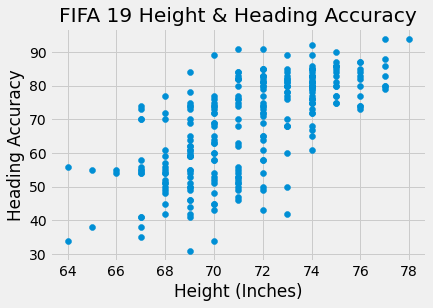

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import style
style.use("fivethirtyeight")

plt.scatter(fifadf.Height, fifadf.HeadingAccuracy)
plt.title('FIFA 19 Height & Heading Accuracy')
plt.xlabel('Height (Inches)')
plt.ylabel('Heading Accuracy')

This is what my heading accuracy would be if I was in FIFA 19: 75 Heading Accuracy


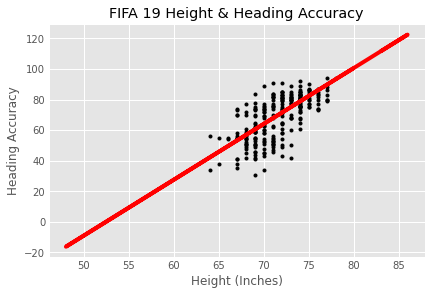

In [5]:
#import linear regression function from scikit
from sklearn.linear_model import LinearRegression

#set graph style
style.use("ggplot")

#graph labeling
plt.title('FIFA 19 Height & Heading Accuracy')
plt.xlabel('Height (Inches)')
plt.ylabel('Heading Accuracy')
#use fifa dataframe
fifadf

#create empty arrays to be filled with data for graphing
heightArray = []
headaccArray = []
#loop through data frames to fill data as it goes
i = 0
for i in fifadf.Height:
    heightArray.append([fifadf.Height[i]])
    headaccArray.append([fifadf.HeadingAccuracy[i]])
    i += 1

#plot data on graph
plt.plot(fifadf.Height, fifadf.HeadingAccuracy, 'k.')
plt.grid(True)

#fit with linear regression line/ model
fifaModel = LinearRegression()
fifaModel.fit(X = heightArray, y = headaccArray)
plt.plot(headaccArray, fifaModel.predict(headaccArray), color='r')

#I'm 6'1, so below is my heading accuracy supposedly if I were in FIFA 19
print("This is what my heading accuracy would be if I was in FIFA 19: %.0f Heading Accuracy" % 
      fifaModel.predict([[73]])[0][0]
     )

In [6]:
#Calculate RSS
import numpy as np
print('Residual sum of squares: %.2f' % 
      np.sum((headaccArray - fifaModel.predict(heightArray)) ** 2))
#DEFINITELY NO CORRELATION, BUT THIS WAS FUN ANYWAY

Residual sum of squares: 37390.73
